# BIA-652 Lab 1 Assignment. Intro to Pandas

Note: Please **DO NOT** share your answers with anyone, including uploading to Github, Course Hero, etc. 

### Your Name: 

In [2]:
import numpy as np #numerical computation
import pandas as pd #processing dataframes
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Use the `RegularSeasonCompactResults` data to answer the following questions:  

In [3]:
# Download example data set
import urllib.request
from zipfile import ZipFile

urllib.request.urlretrieve("http://fengmai.net/download/data/bia652/pandas_data.zip", 
                           "pandas_data.zip")
ZipFile("pandas_data.zip").extractall()
df = pd.read_csv('data/RegularSeasonCompactResults.csv')

In [4]:
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


__Q1: Create a new column `total_score` as the sum of Wscore and Lscore.__ 

In [5]:
df['total_sum'] = df.Wscore + df.Lscore
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,total_sum
0,1985,20,1228,81,1328,64,N,0,145
1,1985,25,1106,77,1354,70,H,0,147
2,1985,25,1112,63,1223,56,H,0,119
3,1985,25,1165,70,1432,54,H,0,124
4,1985,25,1192,86,1447,74,H,0,160


__Q2: What is the min, max, average, and median of the total_score?__ 

In [6]:
df.total_sum.describe()

count    145289.000000
mean        141.097330
std          21.601779
min          62.000000
25%         126.000000
50%         140.000000
75%         155.000000
max         331.000000
Name: total_sum, dtype: float64

In [7]:
df.total_sum.median()

140.0

Min = 62.000000
Max = 331.000000
Average = 141.097330
Median = 140.0

__Q3: Find the average total score for each year (season).__ 

In [8]:
avg_total_score = df.groupby(['Season'])[['total_sum']].mean()
avg_total_score.reset_index(inplace=True)
avg_total_score.head()

,Season,total_sum
0,1985,138.583356
1,1986,138.447528
2,1987,144.764496
3,1988,147.470796
4,1989,151.259351


__Q4: Plot a time series plot of average total score by year (season)__ 

Hint: search Google for: how to plot a pandas series or [read the user guide](https://pandas.pydata.org/docs/user_guide/visualization.html)


[Text(0, 0.5, 'Avg_total_score'), Text(0.5, 0, 'Season')]

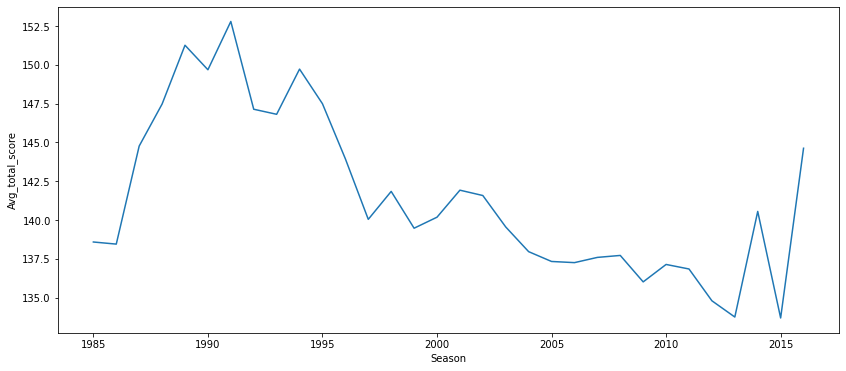

In [9]:
plt.figure(figsize=(14, 6))
x = sns.lineplot(x = avg_total_score.Season, y = avg_total_score.total_sum)
x.set(xlabel="Season", ylabel = "Avg_total_score")

__Q5: Which year has the highest percentage of blowout games, which is defined as a winning margin of at least 30 points?__ 



In [10]:
df['blowout'] = df.apply(lambda x:1 if (x['Wscore'] - x['Lscore'] >= 30) else 0, axis=1)
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,total_sum,blowout
0,1985,20,1228,81,1328,64,N,0,145,0
1,1985,25,1106,77,1354,70,H,0,147,0
2,1985,25,1112,63,1223,56,H,0,119,0
3,1985,25,1165,70,1432,54,H,0,124,0
4,1985,25,1192,86,1447,74,H,0,160,0


In [11]:
tmp1_df = df.groupby(['Season'])[['blowout']].sum()
tmp1_df.reset_index(inplace=True)
tmp1_df.head()

,Season,blowout
0,1985,166
1,1986,187
2,1987,185
3,1988,242
4,1989,260


In [12]:
df['tmp'] = 1
tmp2_df = df.groupby(['Season'])[['tmp']].count()
tmp2_df.reset_index(inplace=True)
tmp2_df.head()
# Here tmp series describes total number of match played in the season

,Season,tmp
0,1985,3737
1,1986,3783
2,1987,3915
3,1988,3955
4,1989,4037


In [13]:
tmp3_df = pd.merge(tmp1_df,tmp2_df,how='inner')
tmp3_df.head()

,Season,blowout,tmp
0,1985,166,3737
1,1986,187,3783
2,1987,185,3915
3,1988,242,3955
4,1989,260,4037


In [14]:
tmp3_df['blowout_per'] = (tmp3_df.blowout / tmp3_df.tmp) * 100
tmp3_df.head()

,Season,blowout,tmp,blowout_per
0,1985,166,3737,4.442066
1,1986,187,3783,4.943167
2,1987,185,3915,4.725415
3,1988,242,3955,6.118837
4,1989,260,4037,6.440426


In [15]:
max = tmp3_df.blowout_per.max()
tmp3_df.loc[tmp3_df['blowout_per'] == max]

,Season,blowout,tmp,blowout_per
6,1991,291,4123,7.057967


**Q6: For each team and season combination,   
a) find the average number of points scored by the team per game in each season;  
b) plot the average points scored by team 1461 by year.**

Hint: This requires you to consider both the case when the team won (Wscore) and when the team lost (Lscore).  
Your answer for each team-year combination should be between Wscore_when_winning and Lscore_when_losing in the last dataframe of the tutorial. 

In [54]:
#Num of points scored by each team
tmp1 = df.groupby(['Season','Wteam']).Wscore.sum()
tmp1 = tmp1.reset_index()
type(tmp1)

pandas.core.frame.DataFrame

In [55]:
tmp1.head()

,Season,Wteam,Wscore
0,1985,1102,355
1,1985,1103,632
2,1985,1104,1514
3,1985,1106,751
4,1985,1108,1631


In [116]:
tmp2 = df.groupby(['Season','Lteam']).Lscore.sum()
tmp2 = tmp2.reset_index()
tmp2.head()

,Season,Lteam,Lscore
0,1985,1102,1159
1,1985,1103,772
2,1985,1104,541
3,1985,1106,968
4,1985,1108,444


In [117]:
tmp22 = pd.merge(tmp1,tmp2,how='inner',left_on=['Season','Wteam'],right_on=['Season','Lteam'])
tmp22.head()

,Season,Wteam,Wscore,Lteam,Lscore
0,1985,1102,355,1102,1159
1,1985,1103,632,1103,772
2,1985,1104,1514,1104,541
3,1985,1106,751,1106,968
4,1985,1108,1631,1108,444


In [119]:
tmp22['total_score'] = tmp22.Wscore + tmp22.Wscore

In [120]:
tmp22.head()

,Season,Wteam,Wscore,Lteam,Lscore,total_score
0,1985,1102,355,1102,1159,710
1,1985,1103,632,1103,772,1264
2,1985,1104,1514,1104,541,3028
3,1985,1106,751,1106,968,1502
4,1985,1108,1631,1108,444,3262


In [122]:
#Num of games played by each team
tmp11 = df.groupby(['Season','Wteam']).tmp.sum()
tmp11 = tmp11.reset_index()
tmp11.head()

,Season,Wteam,tmp
0,1985,1102,5
1,1985,1103,9
2,1985,1104,21
3,1985,1106,10
4,1985,1108,19


In [123]:
tmp111 = df.groupby(['Season','Lteam']).tmp.sum()
tmp111 = tmp111.reset_index()
tmp111.head()

,Season,Lteam,tmp
0,1985,1102,19
1,1985,1103,14
2,1985,1104,9
3,1985,1106,14
4,1985,1108,6


In [124]:
tmp1111 = pd.merge(tmp11,tmp111,how='inner',left_on=['Season','Wteam'],right_on=['Season','Lteam'])
tmp1111['total_games']  = tmp1111.tmp_x + tmp1111.tmp_y
tmp1111.head()

,Season,Wteam,tmp_x,Lteam,tmp_y,total_games
0,1985,1102,5,1102,19,24
1,1985,1103,9,1103,14,23
2,1985,1104,21,1104,9,30
3,1985,1106,10,1106,14,24
4,1985,1108,19,1108,6,25


In [125]:
# removing cols which are not required
tmp_final1 = tmp1111.drop(columns=['tmp_x','Lteam','tmp_y'])
tmp_final1.head()

,Season,Wteam,total_games
0,1985,1102,24
1,1985,1103,23
2,1985,1104,30
3,1985,1106,24
4,1985,1108,25


In [128]:
tmp_final2 = tmp22.drop(columns=['Wscore'	,'Lteam'	,'Wscore','Lscore'])
tmp_final2.head()

,Season,Wteam,total_score
0,1985,1102,710
1,1985,1103,1264
2,1985,1104,3028
3,1985,1106,1502
4,1985,1108,3262


In [129]:
tmp_final = pd.merge(tmp_final1,tmp_final2,how='inner',left_on=['Season','Wteam'],right_on=['Season','Wteam'])
tmp_final.head()

,Season,Wteam,total_games,total_score
0,1985,1102,24,710
1,1985,1103,23,1264
2,1985,1104,30,3028
3,1985,1106,24,1502
4,1985,1108,25,3262


In [131]:
tmp_final['avg_score'] = tmp_final.total_score / tmp_final.total_games

In [132]:
tmp_final.head()

,Season,Wteam,total_games,total_score,avg_score
0,1985,1102,24,710,29.583333
1,1985,1103,23,1264,54.956522
2,1985,1104,30,3028,100.933333
3,1985,1106,24,1502,62.583333
4,1985,1108,25,3262,130.480000


In [137]:
#plot the average points scored by team 1461 by year
sub_final = tmp_final.loc[tmp_final['Wteam'] == 1461]
sub_final.head()

,Season,Wteam,total_games,total_score,avg_score
278,1985,1461,26,1646,63.307692
560,1986,1461,29,2580,88.965517
849,1987,1461,30,3014,100.466667
1139,1988,1461,30,3914,130.466667
1432,1989,1461,31,2246,72.451613


[Text(0, 0.5, 'Avg_score'), Text(0.5, 0, 'Season')]

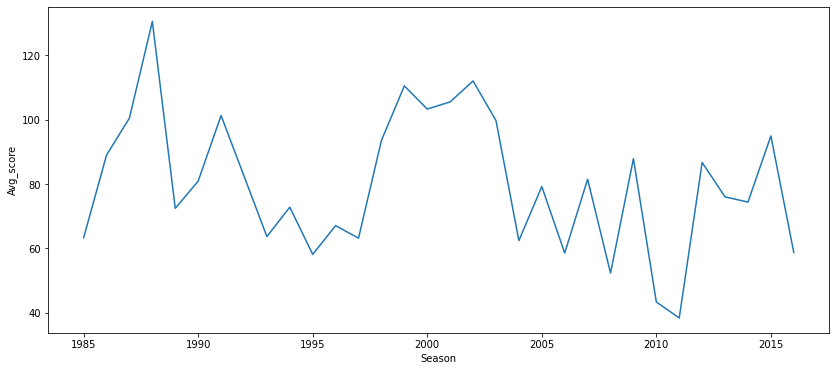

In [138]:
plt.figure(figsize=(14, 6))
x = sns.lineplot(x = sub_final.Season, y = sub_final.avg_score)
x.set(xlabel="Season", ylabel = "Avg_score")